# Statistical Inference on the Composition of Red Wine
Group: 44

Members: Anthony Leong, Arav Dewan, Nikita Prabhu, Xiaomeng Zhou

### Introduction

As a commodity to be consumed, the quality of wine is of great importance, though it can differ greatly from wine to wine. A possible factor that influences the quality of a wine is its composition, so this study will aim to use statistical inference to determine if there is a significant difference between the compositions of different quality wines.

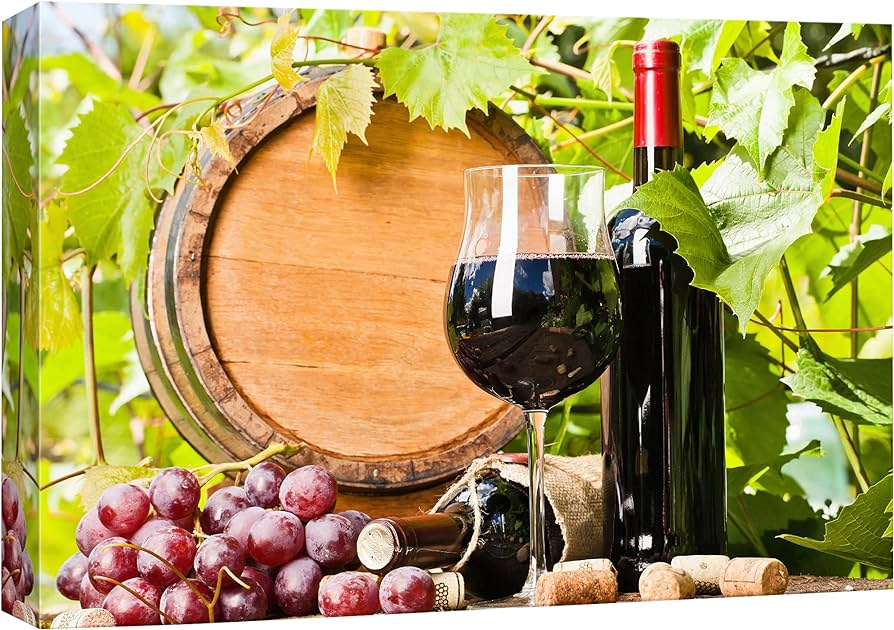

The dataset used is the [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) dataset from the UCI machine learning repository, and it consists of red and white variants of *vinho verde* wine. For this study, we will only be using red wine and we will classify each wine as either "low" or "high" quality.

Wine quality is linked to what is referred to as the sugar-acid balance, so understanding how the acidity of a wine affects its quality is of significant importance. Therefore, the variables of interest are `fixed_acidity` and `volatile_acidity`, and our research question is:

**Do fixed acidity and volatile acidity differ between different qualities of red wine?**

### Preliminary Results

In [ ]:
#loading necessary packages
library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)
install.packages("corrplot")
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.92 loaded



In [ ]:
#reading dataset
options(repr.matrix.max.rows = 8)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
raw_wine_data <- read_delim(url, skip = 1, delim = ";",
                            col_names = c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
                                          "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide",
                                          "density", "pH", "sulphates", "alcohol", "quality"))
raw_wine_data

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


Table 1: Raw dataset of red wines

There are many possible ways to classify each wine as either "low" or "high" quality, but for this study, we will use the mean of quality as the cutoff between “low” and “high” quality.

In [ ]:
#converting quality to "HIGH" or "LOW"
mean_quality <- raw_wine_data |>
    summarize(mean_quality = mean(quality)) |>
    pull()

low_quality <- raw_wine_data |>
    filter(quality <= mean_quality) |>
    mutate(quality = "LOW")

high_quality <- raw_wine_data |>
    filter(quality > mean_quality) |>
    mutate(quality = "HIGH")

wine_data <- bind_rows(low_quality, high_quality)
wine_data

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,LOW
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,LOW
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,LOW
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,LOW
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.8,0.62,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,HIGH
5.9,0.55,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,HIGH
6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,HIGH
6.0,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,HIGH


Table 2: Dataset of red wines, classified as either "HIGH" or "LOW" quality

Now that each wine has been classified, we can compute summary statistics to estimate various parameters across each category of wine quality, and also visualize the distributions of our two variables of interest across each category of wine quality.

In [ ]:
#calculate summary statistics

low_quality_stats <- low_quality |>
    summarize(Quality = "LOW",
              n = n(),
              "Fixed Acidity Mean" = mean(fixed_acidity),
              "Fixed Acidity SD" = sd(fixed_acidity),
              "Volatile Acidity Mean" = mean(volatile_acidity),
              "Volatile Acidity SD" = sd(volatile_acidity))

high_quality_stats <- high_quality |>
    summarize(Quality = "HIGH",
              n = n(),
              "Fixed Acidity Mean" = mean(fixed_acidity),
              "Fixed Acidity SD" = sd(fixed_acidity),
              "Volatile Acidity Mean" = mean(volatile_acidity),
              "Volatile Acidity SD" = sd(volatile_acidity))

summary_stats <- bind_rows(low_quality_stats, high_quality_stats)
summary_stats

Quality,n,Fixed Acidity Mean,Fixed Acidity SD,Volatile Acidity Mean,Volatile Acidity SD
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LOW,744,8.142204,1.572396,0.5895027,0.1779562
HIGH,855,8.474035,1.862795,0.4741462,0.1619993


Table 3: Table of summary statistics

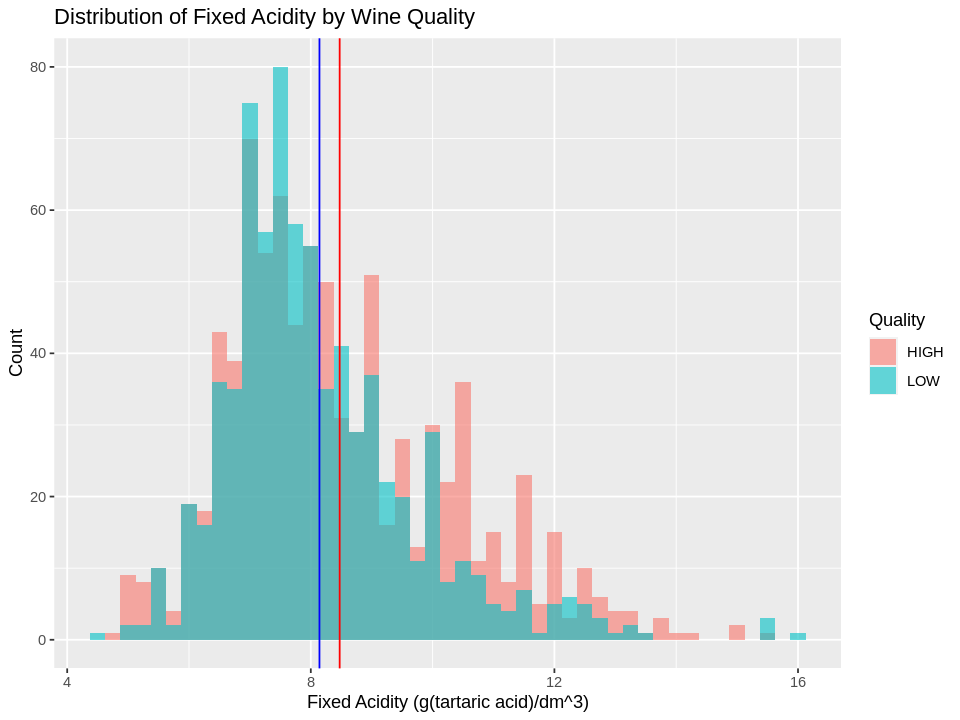

In [ ]:
#visualizing the distribution of fixed acidity by wine quality
options(repr.plot.width = 8, repr.plot.height = 6)

fixed_plot <- wine_data |>
    ggplot(aes(x = fixed_acidity, fill = quality)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 0.25) +
    geom_vline(xintercept = 8.474035, color = "red") +
    geom_vline(xintercept = 8.142204, color = "blue") +
    labs(x = "Fixed Acidity (g(tartaric acid)/dm^3)",
         y = "Count",
         title = "Distribution of Fixed Acidity by Wine Quality",
         fill = "Quality")
fixed_plot

Figure 1: Histogram comparing the distribution of `fixed_acidity` between different wine qualities. The blue line is the mean of `fixed_acidity` for "low" quality wines, and the red line is the mean of `fixed_acidity` for "high" quality wines.

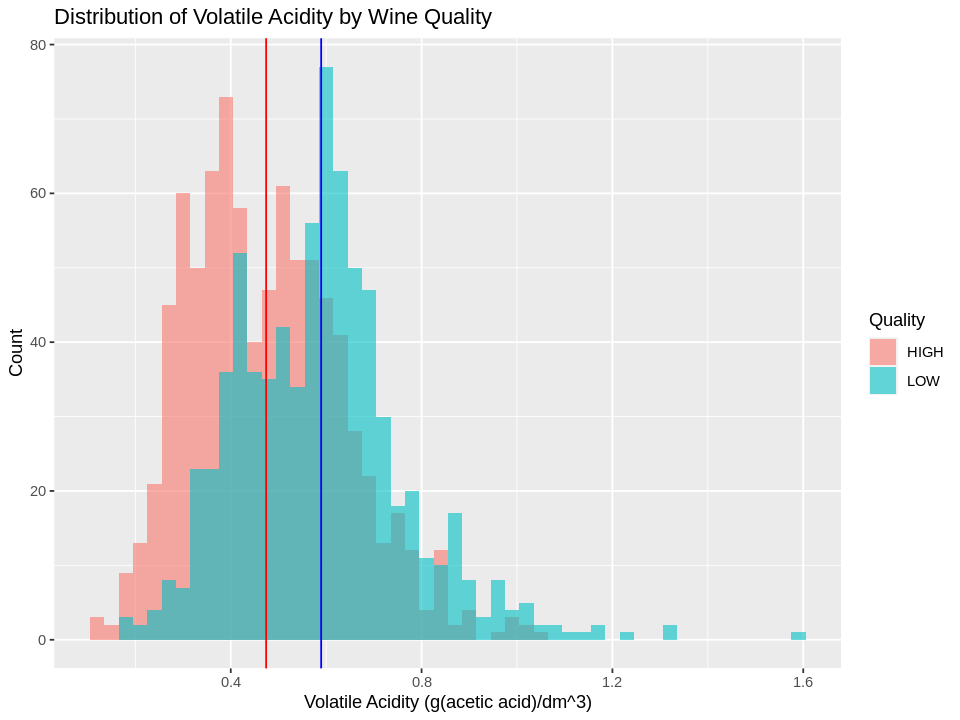

In [ ]:
#visualizing the distribution of volatile acidity by wine quality
options(repr.plot.width = 8, repr.plot.height = 6)

fixed_plot <- wine_data |>
    ggplot(aes(x = volatile_acidity, fill = quality)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 0.03) +
    geom_vline(xintercept = 0.4741462, color = "red") +
    geom_vline(xintercept = 0.5895027, color = "blue") +
    labs(x = "Volatile Acidity (g(acetic acid)/dm^3)",
         y = "Count",
         title = "Distribution of Volatile Acidity by Wine Quality",
         fill = "Quality")
fixed_plot

Figure 2: Histogram comparing the distribution of `volatile_acidity` between different wine qualities. The blue line is the mean of `volatile_acidity` for "low" quality wines, and the red line is the mean of `volatile_acidity` for "high" quality wines.

### Methods: Plan

In this report, we will use rigorous statistical inference methods (hypothesis testing and confidence intervals) and our data source is reliable (UC Irvine Machine Learning Repository), so our report should be trustworthy.

Although we have computed point estimates for the means of `fixed_acidity` and `volatile_acidity`, these findings would not be enough to present to a stakeholder, as we have not determined the uncertainty associated with each point estimate. We will remedy this by using hypothesis tests and constructing confidence intervals through bootstrap sampling.

Let $\mu_{fh}$, $\mu_{fl}$, $\mu_{vh}$, and $\mu_{vl}$ be defined as follows:

- $\mu_{fh}$ represents the population mean of `fixed_acidity` for "high" quality wines
- $\mu_{fl}$ represent the population mean of `fixed_acidity` for "low" quality wines
- $\mu_{vh}$ represent the population mean of `volatile_acidity` for "high" quality wines
- $\mu_{vl}$ represent the population mean of `volatile_acidity` for "low" quality wines

Hypothesis tests 1: \
$H_0$: $\mu_{fh} - \mu_{fl} = 0$\
$H_1$: $\mu_{fh} - \mu_{fl} \neq 0$

Hypothesis tests 2: \
$H_0$: $\mu_{vh} - \mu_{vl} = 0$\
$H_1$: $\mu_{vh} - \mu_{vl} \neq 0$

For both hypothesis tests, we will use $\alpha = 0.1$ as our significance level.

We will use bootstrap resampling with replacement to construct $90 \%$ confidence intervals for:
- The difference in the mean of `fixed_acidity` between different wine qualities
- The difference in the mean of `volatile_acidity` between "high" and "low" quality wine

From looking at Figures 1 and 2, we expect that the mean of `fixed_acidity` would not be significantly different between "low" and "high" quality red wine. On the other hand, we expect that the mean of `volatile_acidity` would be significantly different between "low" quality and "high" quality red wine.

The results of this analysis will provide important information that can be used by wine producers to adjust their winemaking processes to improve their wine quality, and by consumers to be able to better judge the quality of wine before they purchase it.

If this analysis is successful, we could extend this analysis to other types of wine and/or other variables that significantly affect wine quality.

### References

- Ferrer, J., Huang, Z., Kiang, M., Moreno, I., Shaw, M., Wang, W., Asuncion, A., Bi, J., Bishop, C., Boser, B., Cherkassy, V., Cortez, P., Dietterich, T., Ebeler, S., &amp; Fao. (2009, June 9). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems. https://www.sciencedirect.com/science/article/pii/S0167923609001377  
- UCI Machine Learning Repository: Wine Quality Data Set. (n.d.). UCI. https://archive.ics.uci.edu/ml/datasets/wine+quality
- White, N. A. (2019, March 18). Fixed acidity. Waterhouse Lab. https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
- White, N. A. (2019, March 18). Volatile acidity. Waterhouse Lab. https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity